### Bayesian blocks

This is a notebook that's just meant to explore the Bayesian blocks algorithm, in an attempt to understand how to define block lengths, and how the algorithm counts the number of events in a block.

It's just an attempt to mesh the astropy stats algorithm with the MATLAB algorith in Scargle 2013.

In [1]:
import numpy as np
import astropy.stats as astats
import matplotlib.pyplot as plt
import math


In [3]:

t = np.random.normal(size=100)
bb_edges = astats.bayesian_blocks(t, fitness='events', p0=0.01)

print(bb_edges)

[-2.76983185 -1.11019389  0.69169136  2.71244943]


In [4]:
#Sort our test time series
ts = np.sort(t) + 4
num_points = len(ts)

# Define edges of the cells according to the Voronoi tesselation. 
# Leave the first and last as they are (i.e. the edges, and do the rest)

cell_edge = np.concatenate([ts[:1],0.5*(ts[1:]+ts[:-1]),ts[-1:]])
print(cell_edge[0:11])
print(ts[0:10])


# Define the block-lengths (not the cell-lengths)
block_length = ts[-1] - cell_edge


# Ncp prior
p0 = 0.01
ncp = 4 - math.log(73.53*p0*num_points**(-0.478))
print(ncp)

#print(b_length[0:11])
#print(c_edge[0:11])

[1.23016815 1.53794354 1.8575554  1.97945182 2.10780384 2.20421277
 2.33208559 2.41334853 2.4810232  2.53277216 2.66533005]
[1.23016815 1.84571893 1.86939186 2.08951178 2.12609591 2.28232963
 2.38184154 2.44485553 2.51719087 2.54835346]
6.508748048682268


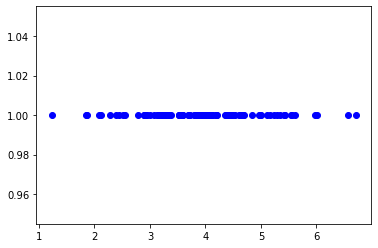

In [17]:
# Just making this so I can plot the events
ones = np.zeros(len(ts)) + 1
plt.plot(ts,ones,'bo')
plt.show()

In [15]:
print(ts[0:12])

[1.23016815 1.84571893 1.86939186 2.08951178 2.12609591 2.28232963
 2.38184154 2.44485553 2.51719087 2.54835346 2.78230665 2.88766162]


In [16]:
print(block_length[0:11])

[5.48228128 5.17450589 4.85489403 4.73299761 4.60464558 4.50823666
 4.38036384 4.29910089 4.23142623 4.17967726 4.04711938]


In [45]:
# testing some rubbish
R = 6
#blocklength = b_length[:(6+1)] 
#print(blocklength)
#print(b_length[6+1])

print("Cumulative sum")
print(np.cumsum(ts[:R + 1]))#
print("Time Series values (backwards):")
print(ts[:R+1][::-1])
print("Cum sum (of reversed ts array)")
print(np.cumsum(ts[:R + 1][::-1]))
print("Cum sum backwards (of reversed ts array)")
print(np.cumsum(ts[:R + 1][::-1])[::-1])

Cumulative sum
[ 1.00728729  3.00014317  5.0112926   7.05431068  9.11493667 11.5031862
 13.9520781 ]
Time Series values (backwards):
[2.4488919  2.38824953 2.06062599 2.04301808 2.01114942 1.99285589
 1.00728729]
Cum sum (of reversed ts array)
[ 2.4488919   4.83714143  6.89776742  8.9407855  10.95193492 12.94479081
 13.9520781 ]
Cum sum backwards (of reversed ts array)
[13.9520781  12.94479081 10.95193492  8.9407855   6.89776742  4.83714143
  2.4488919 ]


In [85]:
# testing
a = np.array([2,3,4,5])
print(a[1:])
#np.cumsum(nn_vec[:7][::-1])[::-1]

[3 4 5]


In [96]:
# The vector of "events" in each cell (one per cell for this data)
nn_vec = np.ones(ts.size)

# Some arrays of zeros to store the outputs
best = np.zeros(num_points, dtype=float)
last = np.zeros(num_points, dtype=int)

#plt.plot(ts[:10],evt[:10],'b.')
#plt.plot(c_edge[:11],evt_edge[:11],'r.')
#plt.show()

In [97]:
# Start with the first data cell; adding one cell at each iteration

for R in range(num_points):
#for R in range(6):
    # Compute fitness of putative last block (which ends at R)
    
    # First get block lengths/duration of all potential blocks up to R
    T_k = block_length[:R+1] - block_length[R+1]
    #print("T_k: ",T_k)
    
    # Get the number of events in each block
    N_k = np.cumsum(nn_vec[:R+1][::-1])[::-1]
    #print("N_k: ", N_k)
    
    # I think this could be written as below 
    # -- reodering an array full of ones makes no sense anyway
    # N_k = np.cumsum(nn_vec[:7])[::-1] 
    
    # Now calculate the fitness for each block
    fit_vec = N_k * (np.log(N_k) + np.log(T_k))
    
     # Apply the prior
    fit_vec = fit_vec - ncp
    fit_vec[1:] = best[:R] #this is for ignoring the first (R = 1)
    #print("fit_vec:")
    #print(fit_vec)
    
    # Now choose where this fitness is maximised
    i_max = np.argmax(fit_vec)
    
    # Keep track of the best fitness function so far, a
    # and the index of the changes point.
    last[R] = i_max
    best[R] = fit_vec[i_max]
       

In [98]:
# Recover the changepoints

change_points = np.zeros(N, dtype=int)
i_cp = N
ind = N
while True:
    i_cp = i_cp - 1
    change_points[i_cp] = ind
    if ind == 0:
        break
    ind = last[ind - 1]
change_points = change_points[i_cp:]


In [101]:
print(change_points)
print(cell_edge[change_points])

[0 6]
[1.53695983 2.24684785]


In [10]:
# Let's define the fitness function for event data

def fitness(N)

# Now compute stuff: start with first data cell, add one cell at each iteration
for R in range(N):
    #Compute fitness of last block (ending at R)
    # write a function (fit_vec) to do this

[-2.37634579 -1.40095652  1.46036906  3.81029626]


In [14]:
events = np.zeros(100) + 1

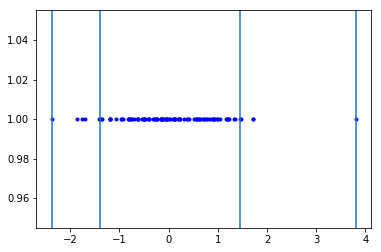

In [19]:
plt.plot(t,events,'b.')
plt.axvline(edges[0])
plt.axvline(edges[1])
plt.axvline(edges[2])
plt.axvline(edges[3])
plt.show()